In [1]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

In [2]:
IMAGE_SIZE = [224, 224]
base_model = InceptionV3(input_shape=IMAGE_SIZE + [3],weights='imagenet', include_top=False)

In [7]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(46, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

In [8]:
for layer in base_model.layers:
    layer.trainable = False

In [9]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [11]:
training_set = train_datagen.flow_from_directory('Datasets/augmented_dataset_80_10_10/train',
                                                 target_size=(224,224),
                                                 batch_size=64,
                                                 class_mode='categorical')
validation = test_datagen.flow_from_directory('Datasets/augmented_dataset_80_10_10/validation', 
                                            target_size=(224,224),
                                            batch_size=64,
                                            class_mode='categorical')

Found 14894 images belonging to 46 classes.
Found 266 images belonging to 46 classes.


In [12]:
r = model.fit_generator(
  training_set,
  validation_data=validation,
  epochs=25,
  steps_per_epoch=len(training_set),
  validation_steps=len(validation)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/25
233/233 [==============================] - 34s 144ms/step - loss: 1.7496 - accuracy: 0.5263 - val_loss: 1.1116 - val_accuracy: 0.6429
Epoch 2/25
233/233 [==============================] - 31s 134ms/step - loss: 0.6658 - accuracy: 0.7990 - val_loss: 0.9322 - val_accuracy: 0.6917
Epoch 3/25
233/233 [==============================] - 31s 135ms/step - loss: 0.4019 - accuracy: 0.8785 - val_loss: 0.7881 - val_accuracy: 0.7519
Epoch 4/25
233/233 [==============================] - 32s 135ms/step - loss: 0.2728 - accuracy: 0.9176 - val_loss: 0.7804 - val_accuracy: 0.7406
Epoch 5/25
233/233 [==============================] - 32s 136ms/step - loss: 0.1903 - accuracy: 0.9445 - val_loss: 0.7777 - val_accuracy: 0.7632
Epoch 6/25
233/233 [==============================] - 32s 136ms/step - loss: 0.1365 - accuracy: 0.9629 - val_loss: 0.7198 - val_accuracy: 0.7895
Epoch 7/25
233/233 [==============================] - 

In [14]:
for i, layer in enumerate(base_model .layers):
   print(i, layer.name)

0 input_1
1 conv2d
2 batch_normalization
3 activation
4 conv2d_1
5 batch_normalization_1
6 activation_1
7 conv2d_2
8 batch_normalization_2
9 activation_2
10 max_pooling2d
11 conv2d_3
12 batch_normalization_3
13 activation_3
14 conv2d_4
15 batch_normalization_4
16 activation_4
17 max_pooling2d_1
18 conv2d_8
19 batch_normalization_8
20 activation_8
21 conv2d_6
22 conv2d_9
23 batch_normalization_6
24 batch_normalization_9
25 activation_6
26 activation_9
27 average_pooling2d
28 conv2d_5
29 conv2d_7
30 conv2d_10
31 conv2d_11
32 batch_normalization_5
33 batch_normalization_7
34 batch_normalization_10
35 batch_normalization_11
36 activation_5
37 activation_7
38 activation_10
39 activation_11
40 mixed0
41 conv2d_15
42 batch_normalization_15
43 activation_15
44 conv2d_13
45 conv2d_16
46 batch_normalization_13
47 batch_normalization_16
48 activation_13
49 activation_16
50 average_pooling2d_1
51 conv2d_12
52 conv2d_14
53 conv2d_17
54 conv2d_18
55 batch_normalization_12
56 batch_normalization_14
5

In [15]:
for layer in model.layers[:249]:
   layer.trainable = False
for layer in model.layers[249:]:
   layer.trainable = True

In [16]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
r = model.fit_generator(
  training_set,
  validation_data=validation,
  epochs=25,
  steps_per_epoch=len(training_set),
  validation_steps=len(validation)
)

Epoch 1/25
233/233 [==============================] - 40s 172ms/step - loss: 0.3258 - accuracy: 0.9009 - val_loss: 0.5975 - val_accuracy: 0.8271
Epoch 2/25
233/233 [==============================] - 39s 167ms/step - loss: 0.0151 - accuracy: 0.9965 - val_loss: 0.4476 - val_accuracy: 0.8722
Epoch 3/25
233/233 [==============================] - 39s 168ms/step - loss: 0.0046 - accuracy: 0.9991 - val_loss: 0.4870 - val_accuracy: 0.8571
Epoch 4/25
233/233 [==============================] - 39s 169ms/step - loss: 0.0029 - accuracy: 0.9997 - val_loss: 0.4208 - val_accuracy: 0.8759
Epoch 5/25
233/233 [==============================] - 39s 169ms/step - loss: 0.0013 - accuracy: 0.9999 - val_loss: 0.4269 - val_accuracy: 0.8759
Epoch 6/25
233/233 [==============================] - 39s 169ms/step - loss: 6.0207e-04 - accuracy: 1.0000 - val_loss: 0.4172 - val_accuracy: 0.8797
Epoch 7/25
233/233 [==============================] - 39s 169ms/step - loss: 4.1628e-04 - accuracy: 1.0000 - val_loss: 0.3921 

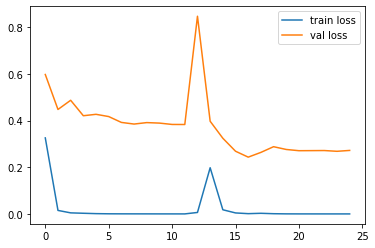

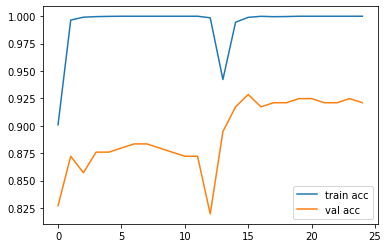

<Figure size 432x288 with 0 Axes>

In [18]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')


plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')